<a href="https://colab.research.google.com/github/codedmachine111/ML/blob/master/BinaryClassification_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install opendatasets -q
import opendatasets as od
od.download('https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset')

100%|██████████| 67.4k/67.4k [00:00<00:00, 11.4MB/s]

In [3]:
df = pd.read_csv('/content/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<Axes: xlabel='stroke', ylabel='count'>

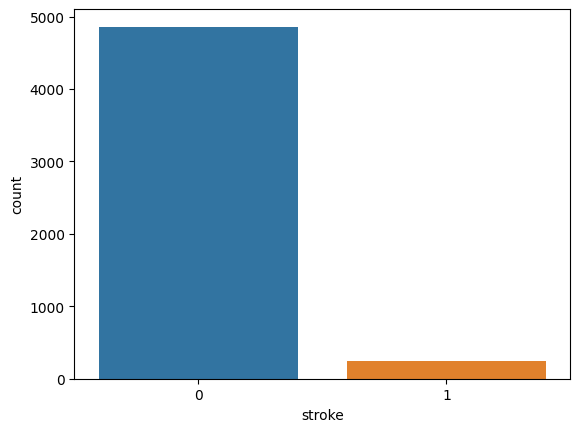

In [6]:
sns.countplot(x='stroke', data=df)

<ipython-input-7-c0c7406231a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

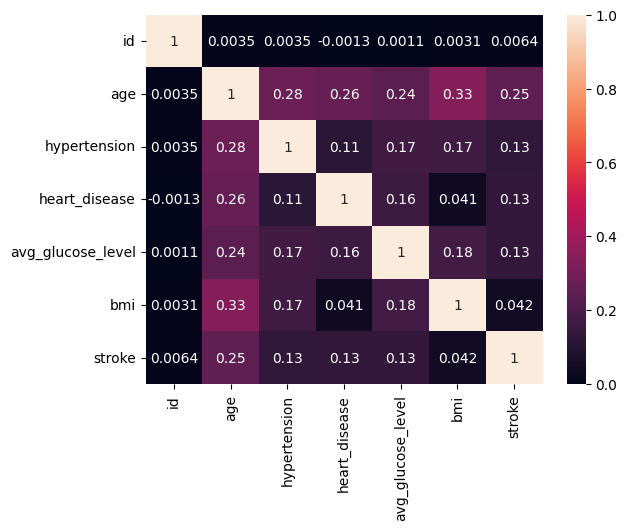

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True)

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

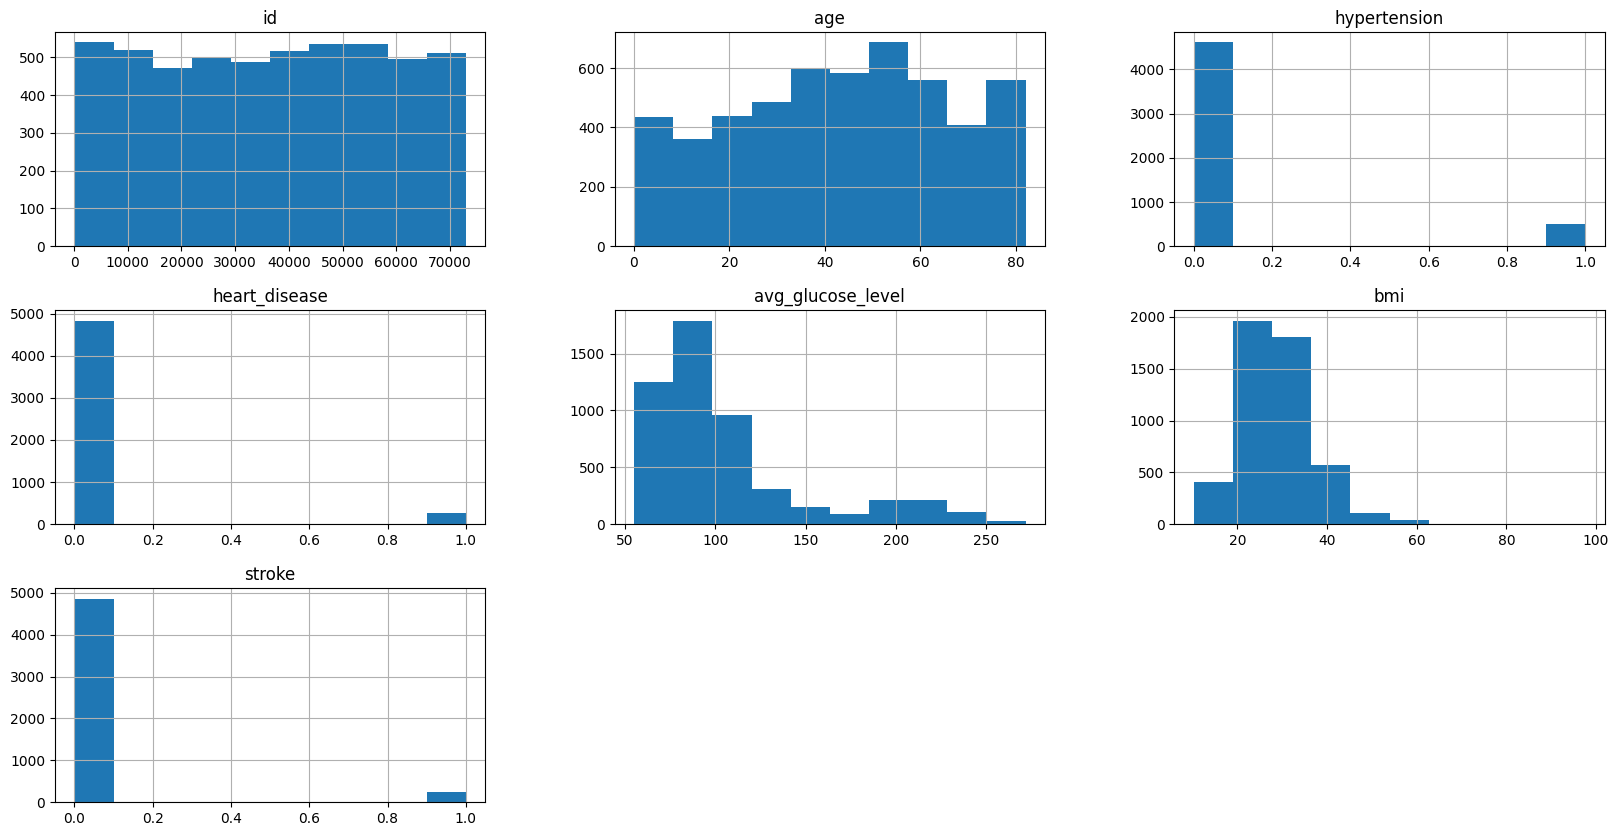

In [8]:
df.hist(bins=10, figsize=(20,10))

In [9]:
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df['bmi'] =df['bmi'].fillna(df['bmi'].mean())

In [12]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
# Scaling features using StandardScaler
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'avg_glucose_level', 'bmi']
std_scaler = StandardScaler()
df[numeric_cols] = std_scaler.fit_transform(df[numeric_cols])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.001234e+00,formerly smoked,1
1,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,4.615554e-16,never smoked,1
2,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,4.685773e-01,never smoked,1
3,Female,0.255342,0,0,Yes,Private,Urban,1.437358,7.154182e-01,smokes,1
4,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-6.357112e-01,never smoked,1


In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['gender'])
df['Residence'] = label_encoder.fit_transform(df['Residence_type'])
df['Employment'] = label_encoder.fit_transform(df['work_type'])
df['Married'] = label_encoder.fit_transform(df['ever_married'])
df['Smoking'] = label_encoder.fit_transform(df['smoking_status'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Residence,Employment,Married,Smoking
0,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.001234e+00,formerly smoked,1,1,1,2,1,1
1,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,4.615554e-16,never smoked,1,0,0,3,1,2
2,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,4.685773e-01,never smoked,1,1,0,2,1,2
3,Female,0.255342,0,0,Yes,Private,Urban,1.437358,7.154182e-01,smokes,1,0,1,2,1,3
4,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-6.357112e-01,never smoked,1,0,0,3,1,2


In [15]:
df.drop(['gender', 'Residence_type', 'work_type', 'ever_married','smoking_status' ], axis=1, inplace=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Gender,Residence,Employment,Married,Smoking
0,1.051434,0,1,2.706375,1.001234e+00,1,1,1,2,1,1
1,0.786070,0,0,2.121559,4.615554e-16,1,0,0,3,1,2
2,1.626390,0,1,-0.005028,4.685773e-01,1,1,0,2,1,2
3,0.255342,0,0,1.437358,7.154182e-01,1,0,1,2,1,3
4,1.582163,1,0,1.501184,-6.357112e-01,1,0,0,3,1,2


In [16]:
df.shape

(5110, 11)

<Axes: >

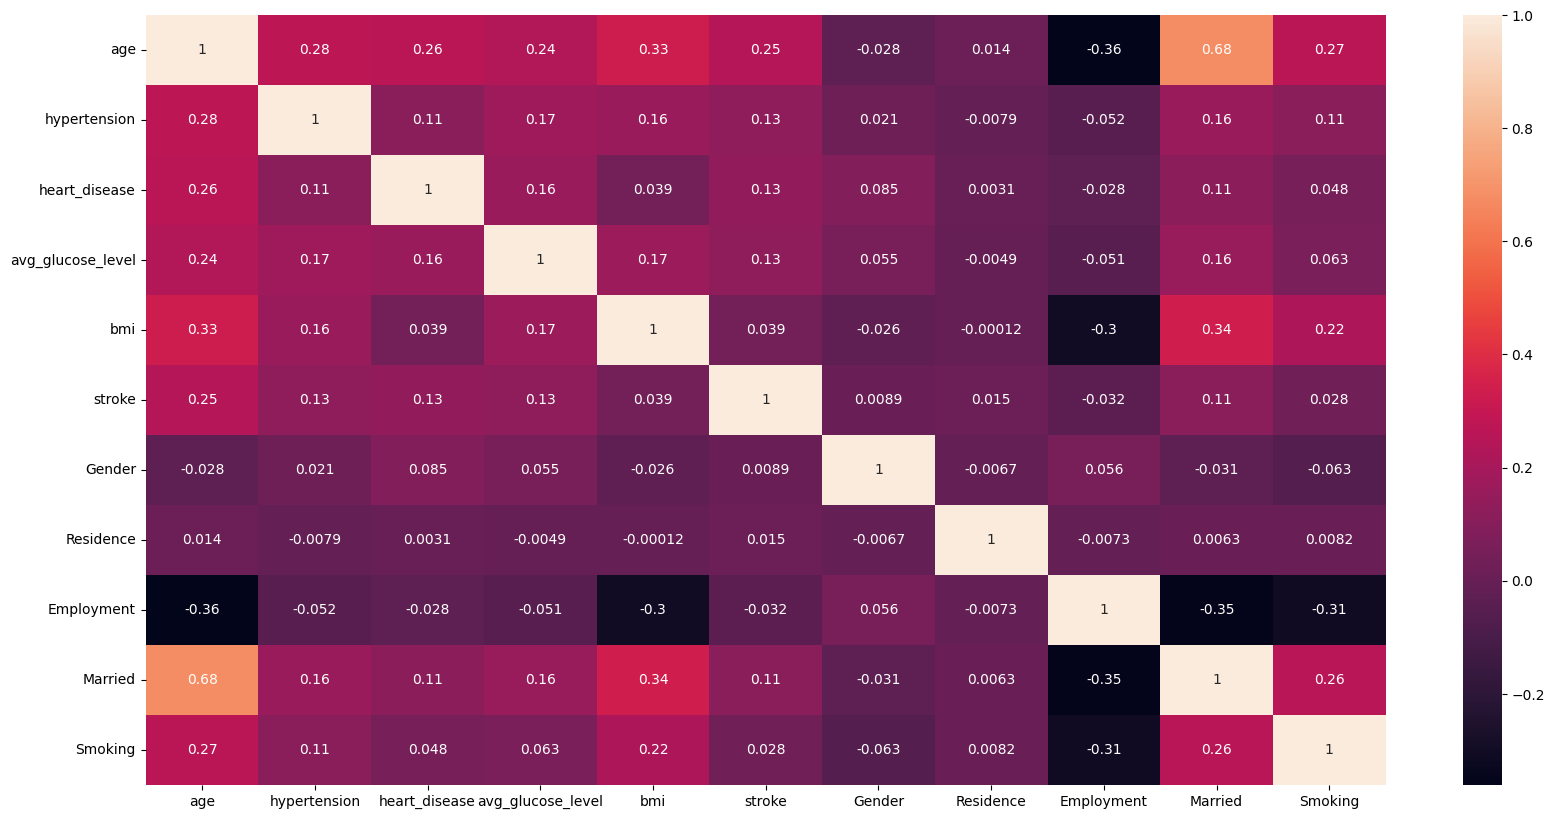

In [17]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

In [84]:
# DO NOT RUN THIS IF STANDARD SCALER IS APPLIED
# Scaling features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale=['age', 'bmi', 'avg_glucose_level']
df_sc = df
df_sc[cols_to_scale] = scaler.fit_transform(df_sc[cols_to_scale])
df_sc.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Gender,Residence,Employment,Married,Smoking
0,0.816895,0,1,0.801265,0.301260,1,1,1,2,1,1
1,0.743652,0,0,0.679023,0.203895,1,0,0,3,1,2
2,0.975586,0,1,0.234512,0.254296,1,1,0,2,1,2
3,0.597168,0,0,0.536008,0.276060,1,0,1,2,1,3
4,0.963379,1,0,0.549349,0.156930,1,0,0,3,1,2


In [18]:
# Finding the highly correlated columns(with each other) and dropping them

def correlation(dataset, threshold):
  corr_col = set()

  corr = dataset.corr()

  for i in range(len(corr.columns)):
    for j in range(i):
      if abs(corr.iloc[i,j]) > threshold:
        # if absolute value of that cell is greater than the threshold, add the column name to the set
        corr_col.add(corr.columns[i])

  return corr_col

In [22]:
corr_cols = correlation(df, 0.35)
corr_cols

{'Employment', 'Married'}

In [23]:
df1 = df.drop(corr_cols, axis=1)
df1 = df1.drop('Gender', axis=1)
df1

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Residence,Smoking
0,1.051434,0,1,2.706375,1.001234e+00,1,1,1
1,0.786070,0,0,2.121559,4.615554e-16,1,0,2
2,1.626390,0,1,-0.005028,4.685773e-01,1,0,2
3,0.255342,0,0,1.437358,7.154182e-01,1,1,3
4,1.582163,1,0,1.501184,-6.357112e-01,1,0,2
...,...,...,...,...,...,...,...,...
5105,1.626390,1,0,-0.494658,4.615554e-16,0,1,2
5106,1.670617,0,0,0.420775,1.442949e+00,0,1,2
5107,-0.363842,0,0,-0.511443,2.217363e-01,0,0,2
5108,0.343796,0,0,1.328257,-4.278451e-01,0,0,1


In [24]:
y = df1['stroke']
X = df1.drop('stroke', axis=1)
X.shape, y.shape

((5110, 7), (5110,))

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4088, 7), (1022, 7), (4088,), (1022,))

In [39]:
# The target labels are significantly imbalanced
# Using SMOTE (Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Applying SMOTE only to TRAINING DATA
X_train, y_train = smote.fit_resample(X_train, y_train)

In [40]:
X_train.shape, y_train.shape

((7802, 7), (7802,))

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

acc = accuracy_score(y_test, y_pred)
acc

0.7446183953033269

In [55]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[716, 244],
       [ 17,  45]])

In [66]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7358198924731183

# Comparing with RandomForect Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
rf_pred = rf.predict(X_test)

In [48]:
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cm

array([[897,  63],
       [ 44,  18]])

In [65]:
auc_rf = roc_auc_score(y_test, rf_pred)
auc_rf

0.6123487903225806

# Comparing with SVM

In [58]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [59]:
sv_pred = svc.predict(X_test)

In [60]:
svc_cm = confusion_matrix(y_test, sv_pred)
svc_cm

array([[725, 235],
       [ 20,  42]])

In [64]:
auc_svc = roc_auc_score(y_test, sv_pred)
auc_svc

0.7163138440860215